In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving IMDB_updated_Dataset.csv to IMDB_updated_Dataset.csv


In [2]:
!pip install texthero -U
!pip install -U spacy
!pip install wordcloud
!pip install -U textblob
!python -m textblob.download_corpora
import seaborn as sns
import texthero as hero
from texthero import stopwords
import os
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 7.5 MB/s 
     |████████████████████████████████| 5.0 MB 54.4 MB/s 
     |████████████████████████████████| 211 kB 63.3 MB/s 
     |████████████████████████████████| 1.1 MB 57.7 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.3
    Uninstalling spacy-3.4.3:
      Successfully uninstalled spacy-3.4.3
ERROR: pip's dependency resolver does not currently take into 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv("IMDB_updated_Dataset.csv")

In [ ]:

df.head()

,Unnamed: 0,review,sentiment,len
0,0,one watch episode hook right exactly first thi...,positive,116
1,1,wonderful little production technique unassumi...,positive,60
2,2,think wonderful way spend time hot summer week...,positive,71
3,3,basically family little boy jake zombie closet...,negative,42
4,4,petter love time money visually stunning watc...,positive,91


In [ ]:
df['sentiment'][5000]

'positive'

In [ ]:
df.shape

(50000, 4)

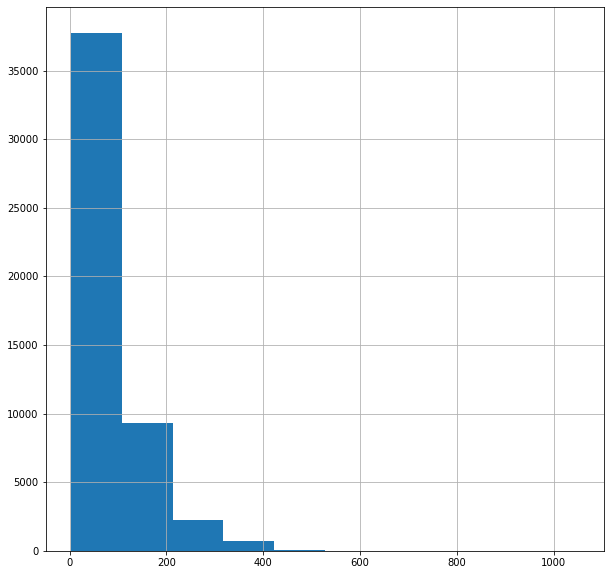

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
df['len'].hist()

In [ ]:
text= ' '.join(t for t in df['review'])
words_list= text.split()
word_freq= dict()
for word in set(words_list):
  word_freq[word] = 0
for word in words_list:
  word_freq[word] += 1   
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])
df_word['word_len']= df_word['word'].map(lambda x: len(x))
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word.head()

,word,count,word_len
0,one,53597,3
1,see,40476,3
2,like,40359,4
3,make,37263,4
4,good,33828,4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


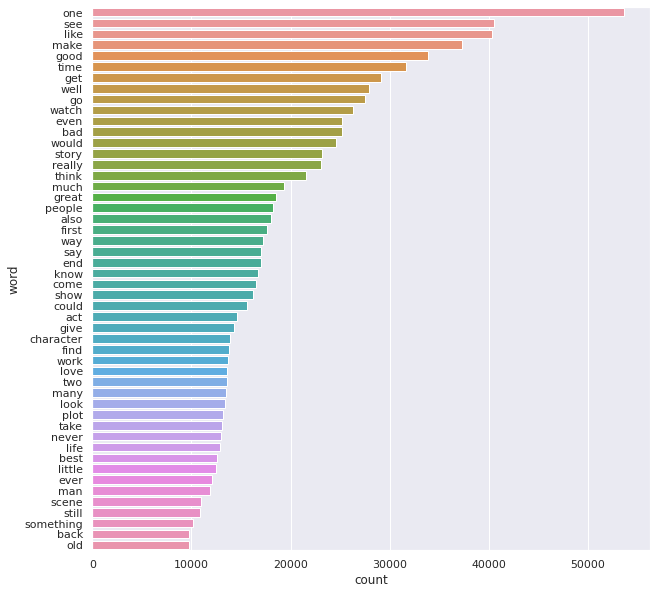

In [ ]:
df_top= df_word.head(50)
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(df_top['count'],df_top['word'])

In [ ]:
df_word.loc()

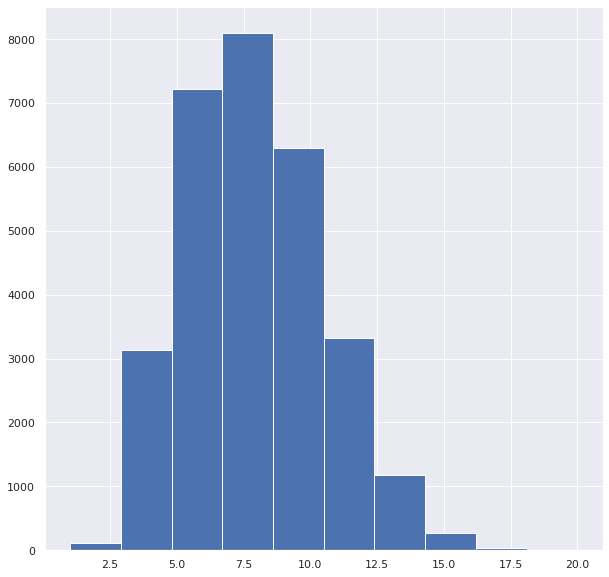

In [ ]:
df_word['word_len'].hist()

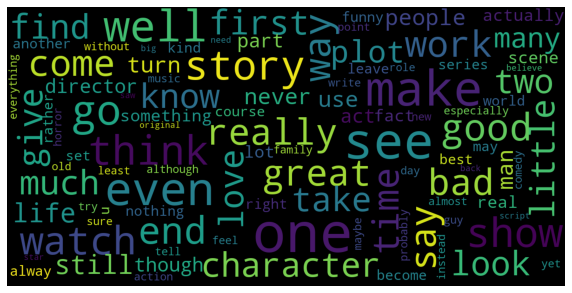

In [ ]:
wordcloud = WordCloud(background_color='black',max_words=100 ,max_font_size=40 ,scale=3,random_state=1).generate(text)
plt.axis("off")
plt.imshow(wordcloud)

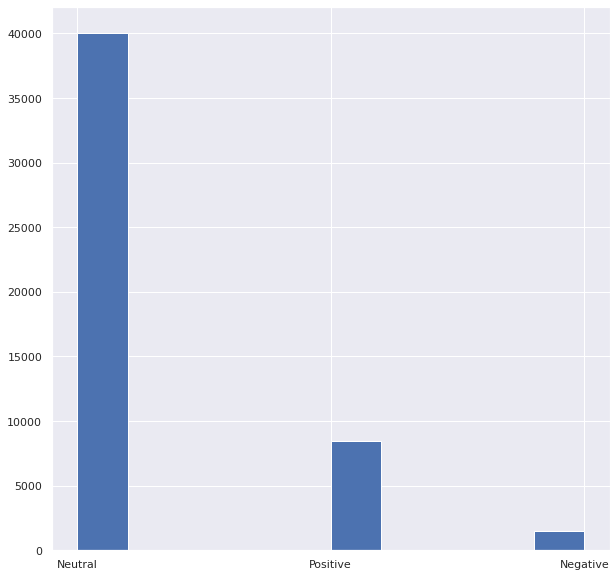

In [ ]:
def polarity(x):
  if TextBlob(x).sentiment[0]<-0.25:
    return 'Negative'
  if TextBlob(x).sentiment[0]>0.25:
    return 'Positive'
  return 'Neutral'
df_tb = df
df_tb['sentiment']= df['review'].map(lambda x: polarity(x))
df_tb['sentiment'].hist()

In [4]:
uploaded = files.upload()

Saving Equity-Evaluation-Corpus.csv to Equity-Evaluation-Corpus.csv


In [5]:
EEC = pd.read_csv("Equity-Evaluation-Corpus.csv") 

In [ ]:
EEC.head()

,ID,Sentence,Template,Person,Gender,Race,Emotion,Emotion word
0,2018-En-mystery-05498,Alonzo feels angry.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,angry
1,2018-En-mystery-11722,Alonzo feels furious.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,furious
2,2018-En-mystery-11364,Alonzo feels irritated.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,irritated
3,2018-En-mystery-14320,Alonzo feels enraged.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,enraged
4,2018-En-mystery-14114,Alonzo feels annoyed.,<person subject> feels <emotion word>.,Alonzo,male,African-American,anger,annoyed


In [6]:
EEC = EEC[EEC.Race != "European"]
EEC = EEC[EEC.Race != "African-American"]


In [7]:
EEC = EEC.drop('Race', axis = 1)

In [ ]:
EEC.head()

,ID,Sentence,Template,Person,Gender,Emotion,Emotion word
400,2018-En-mystery-06888,He feels angry.,<person subject> feels <emotion word>.,he,male,anger,angry
401,2018-En-mystery-04660,He feels furious.,<person subject> feels <emotion word>.,he,male,anger,furious
402,2018-En-mystery-13903,He feels irritated.,<person subject> feels <emotion word>.,he,male,anger,irritated
403,2018-En-mystery-00129,He feels enraged.,<person subject> feels <emotion word>.,he,male,anger,enraged
404,2018-En-mystery-10867,He feels annoyed.,<person subject> feels <emotion word>.,he,male,anger,annoyed


In [8]:
EEC.shape

(2880, 7)

In [10]:
eec = EEC.values.tolist()

In [ ]:
eec

[['2018-En-mystery-06888',
  'He feels angry.',
  '<person subject> feels <emotion word>.',
  'he',
  'male',
  'anger',
  'angry'],
 ['2018-En-mystery-04660',
  'He feels furious.',
  '<person subject> feels <emotion word>.',
  'he',
  'male',
  'anger',
  'furious'],
 ['2018-En-mystery-13903',
  'He feels irritated.',
  '<person subject> feels <emotion word>.',
  'he',
  'male',
  'anger',
  'irritated'],
 ['2018-En-mystery-00129',
  'He feels enraged.',
  '<person subject> feels <emotion word>.',
  'he',
  'male',
  'anger',
  'enraged'],
 ['2018-En-mystery-10867',
  'He feels annoyed.',
  '<person subject> feels <emotion word>.',
  'he',
  'male',
  'anger',
  'annoyed'],
 ['2018-En-mystery-02078',
  'He feels sad.',
  '<person subject> feels <emotion word>.',
  'he',
  'male',
  'sadness',
  'sad'],
 ['2018-En-mystery-06232',
  'He feels depressed.',
  '<person subject> feels <emotion word>.',
  'he',
  'male',
  'sadness',
  'depressed'],
 ['2018-En-mystery-01223',
  'He feels de

In [11]:
eec_female = []
i = 0
j = 0
while i != 1440:
  if eec[j][4] == "female":
    eec_female.append(eec.pop(j))
    j -= 1
    i += 1
  j += 1
print(len(eec), len(eec_female))

1440 1440


In [12]:
eec = [row[1] for row in eec]
eec_female = [row[1] for row in eec_female]

In [13]:
len(eec_female)

1440

In [ ]:
eec

In [ ]:
gbias = []
for i in range(1440):
  gbias.append([eec[i][1], eec_female[i][1]])
df_gbias = pd.DataFrame(gbias, columns =['Male', 'Female'])
df_gbias.to_csv("Updated_EEC.csv")


In [ ]:
df["review"]

0        one watch episode hook right exactly first thi...
1        wonderful little production technique unassumi...
2        think wonderful way spend time hot summer week...
3        basically family little boy jake zombie closet...
4        petter love time money visually stunning  watc...
                               ...                        
49995    think  right good job creative original first ...
49996    bad plot bad dialogue bad act idiotic annoy gr...
49997    catholic teach parochial elementary teach high...
49998    go disagree previous comment side one second r...
49999    one star trek high art expect  good best unfor...
Name: review, Length: 50000, dtype: object

In [14]:
data_mat_master = df["review"].values.tolist()
data_mat_master[0]

'one watch episode hook right exactly first thing strike brutality unflinching violence set right word go trust show faint hearted timid show sex violence classic use word nickname give maximum security state mainly emerald city experimental section prison glass face inwards privacy high agenda em city home many death dodgy shady never far away would say main appeal show due fact go dare forget pretty paint forget charm forget romance mess around first episode ever saw struck nasty say ready watch taste get accustomed high graphic violence violence injustice crook sell nickel kill order get away well mannered middle class turn prison due lack street prison experience watch may become comfortable uncomfortable thats get touch side'

In [15]:
for row in eec:
  data_mat_master.append(row)
for row in eec_female:
  data_mat_master.append(row)

In [16]:
len(data_mat_master)

52880

In [ ]:
type(data_mat_master)

list

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(analyzer = "word", preprocessor = None, stop_words =  'english', max_features = 5000, ngram_range=(1,5))
data_features = vectorizer.fit_transform(data_mat_master)
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(data_features)
data_mat = data_features_tfidf.toarray()

In [ ]:
type(data_mat)

numpy.ndarray

In [ ]:
data_mat.shape

(52880, 500)

In [31]:
y = np.zeros(50000, dtype = 'int8')

for i in range(50000):
  if df['sentiment'][i] == 'positive':
    y[i] = 1
  else:
    y[i] = -1

In [ ]:
df["sentiment"]

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [32]:
y[4]

1

In [33]:
np.random.seed(0)
test_index = np.append(np.random.choice((np.where(y==-1))[0], 2500, replace=False), np.random.choice((np.where(y==1))[0], 2500, replace=False))
train_index = list(set(range(len(y))) - set(test_index))

In [21]:
len(train_index)

45000

In [ ]:
len(data_mat[0])

500

In [ ]:
y[train_index].shape

(45000,)

**Model 1: TextBlob**


In [34]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
def pol(x):
  if TextBlob(x).sentiment[0]<-0.25:
    return 'Negative'
  if TextBlob(x).sentiment[0]>0.25:
    return 'Positive'
  return 'Neutral'
def sub(x):
  if TextBlob(x).sentiment[1]<0.5:
    return 'Objective'
  return 'Subjective'
pol_list = [pol(x) for x in data_mat_master[:50000]]
sub_list = [sub(x) for x in data_mat_master[:50000]]

In [35]:
from sklearn.metrics import accuracy_score

def pol(x):
  if TextBlob(x).sentiment[0]<0:
    return -1
  if TextBlob(x).sentiment[0]>=0:
    return 1
pol_list_train = [pol(data_mat_master[x]) for x in train_index]
pol_list_test = [pol(data_mat_master[x]) for x in test_index]

In [36]:
print("Training Accuracy: %.16f"%(accuracy_score(y[train_index], pol_list_train)))
print("Testing Accuracy: %.16f"%(accuracy_score(y[test_index], pol_list_test)))

Training Accuracy: 0.6988222222222222
Testing Accuracy: 0.6834000000000000


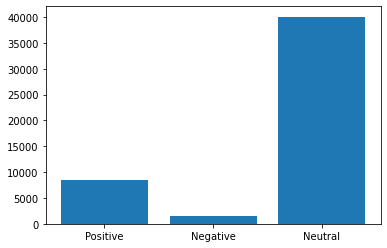

In [ ]:
plt.bar(['Positive', 'Negative', 'Neutral'], [pol_list.count("Positive"), pol_list.count("Negative"), pol_list.count("Neutral")])
plt.show()

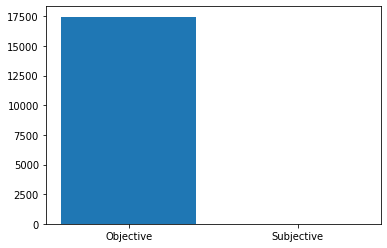

In [ ]:
plt.bar(['Objective', 'Subjective'], [sub_list.count("Objective"), pol_list.count("Subjective")])
plt.show()

Gender Bias Test: Paired t-test

In [37]:
pol = lambda x: TextBlob(x).sentiment.polarity
pol_m_tb = [pol(x) for x in eec]
pol_f_tb = [pol(x) for x in eec_female]

In [ ]:
from scipy.stats import t as t_dist
import sys
def paired_t_test(p):
    p_hat = np.mean(p)
    n = len(p)
    den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
    t = (p_hat * (n**(1/2))) / den
    
    p_value = t_dist.sf(t, n-1)*2
    
    return t, p_value

p_ = []
rng = np.random.RandomState(42)
for i in range(1440):
  p_.append(pol_f_tb[i] - pol_m_tb[i])
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model have Gender Bias")
else:
  print("Nothing can be said")


Paired t-test (TextBlob)
t statistic: nan, p-value: nan

Nothing can be said


<ipython-input-34-ed8542ab50bb>:7: RuntimeWarning: invalid value encountered in double_scalars
  t = (p_hat * (n**(1/2))) / den


**Model 2: Logistic Regression**

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
## Fit logistic classifier on training data
clf = SGDClassifier(loss="log", penalty="none")
clf.fit(data_mat[train_index], y[train_index])
## Pull out the parameters (w,b) of the logistic regression model
# w = clf.coef_[0,:]
# b = clf.intercept_
## Get predictions on training and test data
preds_train = clf.predict(data_mat[train_index])
preds_test = clf.predict(data_mat[test_index])

In [ ]:
print("Training Accuracy: %.16f"%(accuracy_score(y[train_index], preds_train)))
print("Testing Accuracy: %.16f"%(accuracy_score(y[test_index], preds_test)))

Training Accuracy: 0.8409333333333333
Testing Accuracy: 0.8404000000000000


Gender Bias Test: Paired t-test

In [39]:
male_pred_lr = clf.predict_proba(data_mat[50000:51440, :])
female_pred_lr = clf.predict_proba(data_mat[51440: , : ])

In [40]:
male_pred_lr = [row[1] for row in male_pred_lr]
female_pred_lr = [row[1] for row in female_pred_lr]

In [ ]:
p_ = []
for i in range(1440):
  p_.append(male_pred_lr[i] - female_pred_lr[i])
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Gender Bias")
else:
  print("Nothing can be said")

Paired t-test (TextBlob)
t statistic: 14.77668801787653, p-value: 4.140999594994957e-46

The model has Gender Bias


**Model 3: Naive Bayes**

In [41]:
from sklearn.naive_bayes import MultinomialNB

## Fit logistic classifier on training data
clf = MultinomialNB()
clf.fit(data_mat[train_index], y[train_index])
## Pull out the parameters (w,b) of the logistic regression model
# w = clf.coef_[0,:]
# b = clf.intercept_
## Get predictions on training and test data
preds_train = clf.predict(data_mat[train_index])
preds_test = clf.predict(data_mat[test_index])

In [ ]:
print("Training Accuracy: %.16f"%(accuracy_score(y[train_index], preds_train)))
print("Testing Accuracy: %.16f"%(accuracy_score(y[test_index], preds_test)))

Training Accuracy: 0.8193777777777778
Testing Accuracy: 0.8134000000000000


Gender Bias Test: Paired t-test

In [42]:
male_pred_nb = clf.predict_proba(data_mat[50000:51440, :])
female_pred_nb = clf.predict_proba(data_mat[51440: , : ])

In [43]:
male_pred_nb = [row[1] for row in male_pred_nb]
female_pred_nb = [row[1] for row in female_pred_nb]

In [ ]:
p_ = []
for i in range(1440):
  p_.append(male_pred_nb[i] - female_pred_nb[i])
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Gender Bias")
else:
  print("Nothing can be said")

Paired t-test (TextBlob)
t statistic: 18.735681722770778, p-value: 2.936665389797258e-70

The model has Gender Bias


**Model 4: SVM**

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(data_mat[train_index], y[train_index])
preds_train = clf.predict(data_mat[train_index])
preds_test = clf.predict(data_mat[test_index])

In [ ]:
print("Training Accuracy: %.16f"%(accuracy_score(y[train_index], preds_train)))
print("Testing Accuracy: %.16f"%(accuracy_score(y[test_index], preds_test)))

Training Accuracy: 0.8412666666666667
Testing Accuracy: 0.8360000000000000


Gender Bias Test: Paired t-test

In [45]:
male_pred_svm = clf.predict(data_mat[50000:51440, :])
female_pred_svm = clf.predict(data_mat[51440: , : ])

In [ ]:
p_ = []
for i in range(1440):
  p_.append(male_pred_svm[i] - female_pred_svm[i])
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Gender Bias")
else:
  print("Nothing can be said")

Paired t-test (TextBlob)
t statistic: 9.077978388934229, p-value: 3.5438210357393806e-19

The model has Gender Bias


**Model 5: LSTM Networks**

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Activation, Dropout, LSTM, SpatialDropout1D
from keras import optimizers
from tensorflow.keras.utils import to_categorical

y = to_categorical(y,2)

model = Sequential()

model.add(Embedding(500, 128, input_length=data_mat.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(200, dropout = 0.4, recurrent_dropout = 0.3))
# model.add(Dropout(0.6))
# model.add(Dense(125, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(64, activation = "softmax"))
model.add(Dropout(0.25))
model.add(Dense(16, activation = "softmax"))
model.add(Dropout(0.25))
model.add(Dense(2, activation = "softmax"))
optimizer = optimizers.Adam()
model.compile(
    optimizer = 
    optimizer,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          64000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 200)               263200    
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                        

In [23]:
data_mat.shape[1]

500

In [24]:
# from keras.callbacks import ModelCheckpoint

# checkpointer = ModelCheckpoint('best_weights.hdf5', verbose = 1, save_best_only=True)
model.fit(data_mat[train_index],
         y[train_index],
         batch_size=32,
         epochs=1,
        #  callbacks=[checkpointer])
)

1407/1407 [==============================] - 3916s 3s/step - loss: 0.2942 - accuracy: 0.9941


In [26]:
model.evaluate(data_mat[test_index], y[test_index])

157/157 [==============================] - 55s 349ms/step - loss: 0.0987 - accuracy: 1.0000


[0.0987279936671257, 1.0]

Gender Bias Test: Paired t-test

In [27]:
male_pred_lstm = model.predict(data_mat[50000:51440, :])
female_pred_lstm = model.predict(data_mat[51440: , : ])

45/45 [==============================] - 16s 348ms/step


In [28]:
male_pred_lstm = [row[1] for row in male_pred_lstm]
female_pred_lstm = [row[1] for row in female_pred_lstm]

In [29]:
from scipy.stats import t as t_dist
import sys
def paired_t_test(p):
    p_hat = np.mean(p)
    n = len(p)
    den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
    t = (p_hat * (n**(1/2))) / den
    
    p_value = t_dist.sf(t, n-1)*2
    
    return t, p_value
p_ = []
for i in range(1440):
  p_.append(male_pred_lstm[i] - female_pred_lstm[i])
print("Paired t-test (LSTM)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Gender Bias")
else:
  print("Nothing can be said")

Paired t-test (LSTM)
t statistic: nan, p-value: nan

Nothing can be said


<ipython-input-29-c82bc78ad9e1>:7: RuntimeWarning: invalid value encountered in double_scalars
  t = (p_hat * (n**(1/2))) / den


In [46]:
df_plot = []
for i in range(1440):
  df_plot.append([float(male_pred_svm[i] - female_pred_svm[i]), male_pred_lr[i] - female_pred_lr[i], male_pred_nb[i] - female_pred_nb[i], pol_m_tb[i] - pol_f_tb[i], male_pred_lstm[i] - female_pred_lstm[i]])
df_plot = pd.DataFrame(df_plot, columns =['SVM', 'Logistic \nRegression', 'Naive Bayes', 'TextBlob', 'LSTM'])
df_plot.head()

,SVM,Logistic \nRegression,Naive Bayes,TextBlob,LSTM
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


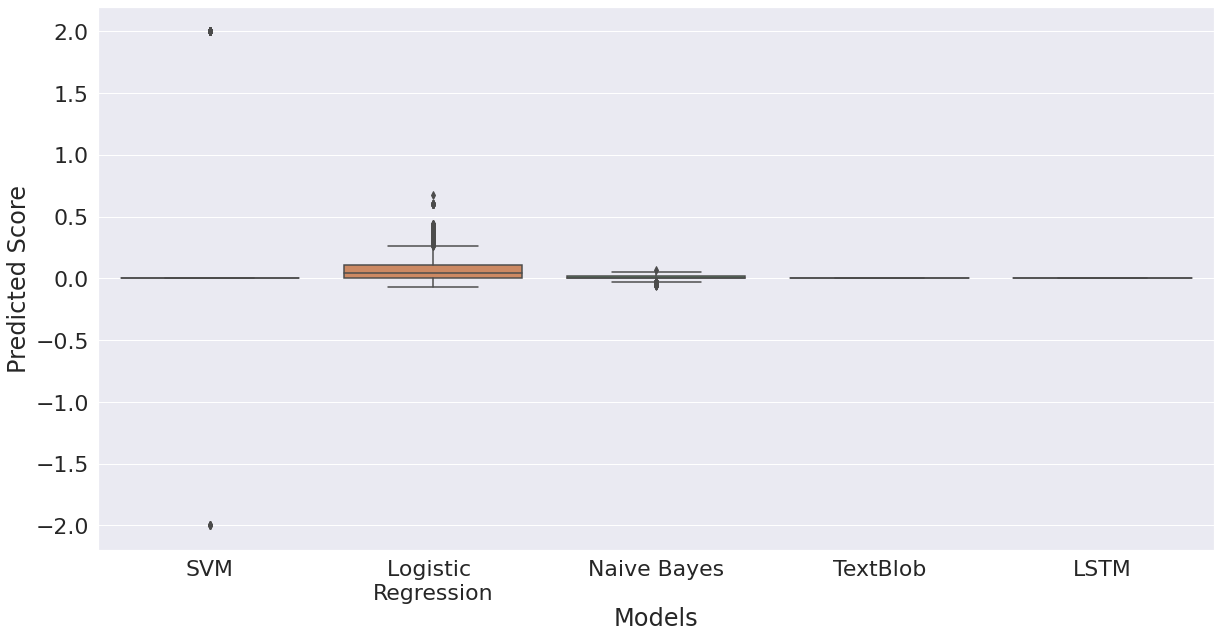

In [47]:
import seaborn as sns
df_plot = pd.melt(df_plot)
df_plot = df_plot.rename(columns = {'variable':'Models', 'value':'Predicted Score'})
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale = 2)
bplot = sns.boxplot(x='Models', y='Predicted Score', data=df_plot)
fig = bplot.get_figure()
fig.savefig("out.png") 